In [1]:
import Pkg
Pkg.activate("/home/matteo/Projects/PhyloBM/")

  Activating project at `~/Projects/PhyloBM`


In [2]:
using FastaIO, PyPlot, PottsEvolver, LinearAlgebra, StatsBase
using SequenceLogos: logo_from_matrix, plot_sequence_logo_aa

/home/matteo/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [3]:
import PyPlot.subplots
subplots(x,y,d)=subplots(x,y,figsize=(y*d, x*d))

subplots (generic function with 2 methods)

In [4]:
include("../utils.jl")

write_sequences (generic function with 1 method)

In [7]:
file_msa_dbd = "/home/matteo/Projects/PhyloBM/DBD/FastTree_out/DBD_alignment.uniref90.cov80_clean_noduplicates.a2m"

file_mcmc_iid_no_reweight = ["/home/matteo/Projects/PhyloBM/DBD/notebooks/mcmc_iid_no_reweight_sim1.fasta",
"/home/matteo/Projects/PhyloBM/DBD/notebooks/mcmc_iid_no_reweight_sim2.fasta",
"/home/matteo/Projects/PhyloBM/DBD/notebooks/mcmc_iid_no_reweight_sim3.fasta",
"/home/matteo/Projects/PhyloBM/DBD/notebooks/mcmc_iid_no_reweight_sim4.fasta",
"/home/matteo/Projects/PhyloBM/DBD/notebooks/mcmc_iid_no_reweight_sim5.fasta"]

file_mcmc_iid_reweight = ["/home/matteo/Projects/PhyloBM/DBD/notebooks/mcmc_iid_reweight_sim1.fasta",
"/home/matteo/Projects/PhyloBM/DBD/notebooks/mcmc_iid_reweight_sim2.fasta",
"/home/matteo/Projects/PhyloBM/DBD/notebooks/mcmc_iid_reweight_sim3.fasta",
"/home/matteo/Projects/PhyloBM/DBD/notebooks/mcmc_iid_reweight_sim4.fasta",
"/home/matteo/Projects/PhyloBM/DBD/notebooks/mcmc_iid_reweight_sim5.fasta"]

file_mcmc_tree = ["/home/matteo/Projects/PhyloBM/DBD/notebooks/mcmc_tree_sim1.fasta",
"/home/matteo/Projects/PhyloBM/DBD/notebooks/mcmc_tree_sim2.fasta",
"/home/matteo/Projects/PhyloBM/DBD/notebooks/mcmc_tree_sim3.fasta",
"/home/matteo/Projects/PhyloBM/DBD/notebooks/mcmc_tree_sim4.fasta",
"/home/matteo/Projects/PhyloBM/DBD/notebooks/mcmc_tree_sim5.fasta"];

In [41]:
n_sim = length(file_mcmc_tree)

5

In [12]:
file_wt = "/home/matteo/Projects/PhyloBM/DBD/notebooks/DBD_WT.fasta"
wt_fasta = readfasta(file_wt)
wt_int = map(x->aa_alphabet.char_to_index[x], collect(wt_fasta[1][2]));

# Logos

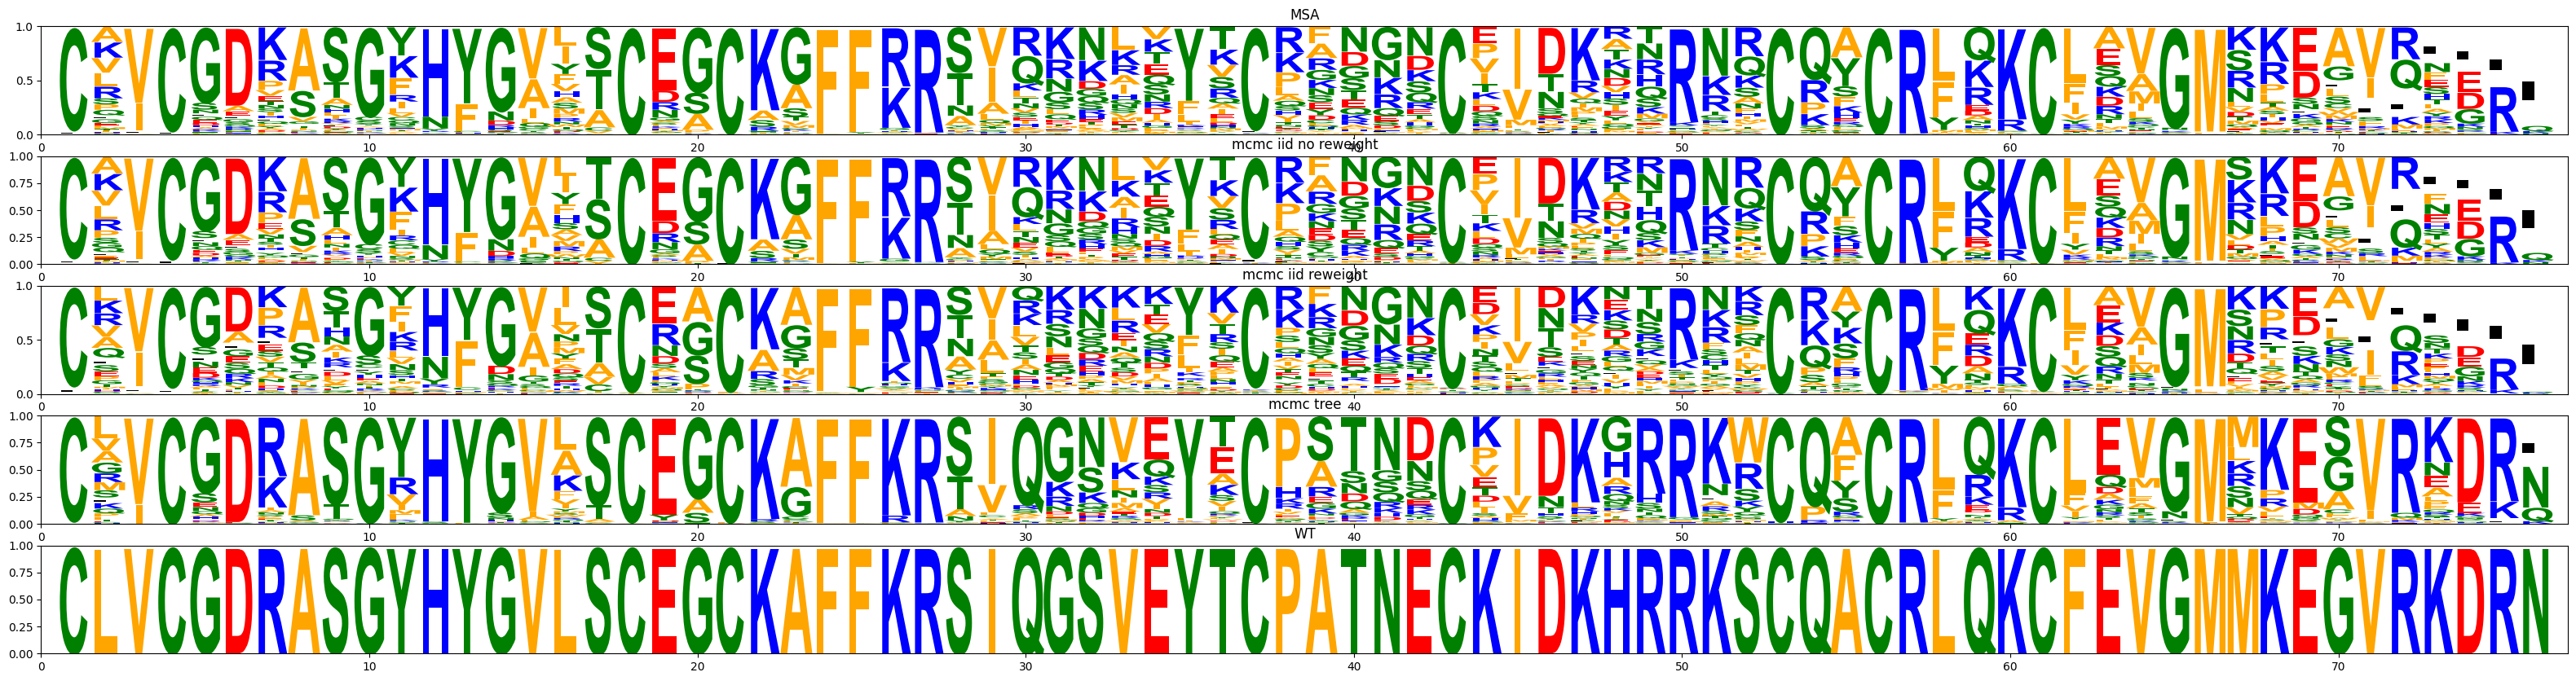

In [14]:
sim_id = 1


fig, ax = subplots(5, 1, figsize=(40,10))

sca(ax[1])
plot_sequence_logo_aa(create_logo_from_fasta(file_msa_dbd, aa_alphabet))
ax[1].set_title("MSA")

sca(ax[2])
plot_sequence_logo_aa(create_logo_from_fasta(file_mcmc_iid_no_reweight[sim_id], aa_alphabet))
ax[2].set_title("mcmc iid no reweight")

sca(ax[3])
plot_sequence_logo_aa(create_logo_from_fasta(file_mcmc_iid_reweight[sim_id], aa_alphabet))
ax[3].set_title("mcmc iid reweight")

sca(ax[4])
plot_sequence_logo_aa(create_logo_from_fasta(file_mcmc_tree[sim_id], aa_alphabet))
ax[4].set_title("mcmc tree")

sca(ax[5])
plot_sequence_logo_aa(create_logo_from_fasta(file_wt, aa_alphabet))
ax[5].set_title("WT")

gcf()



sys:1: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.


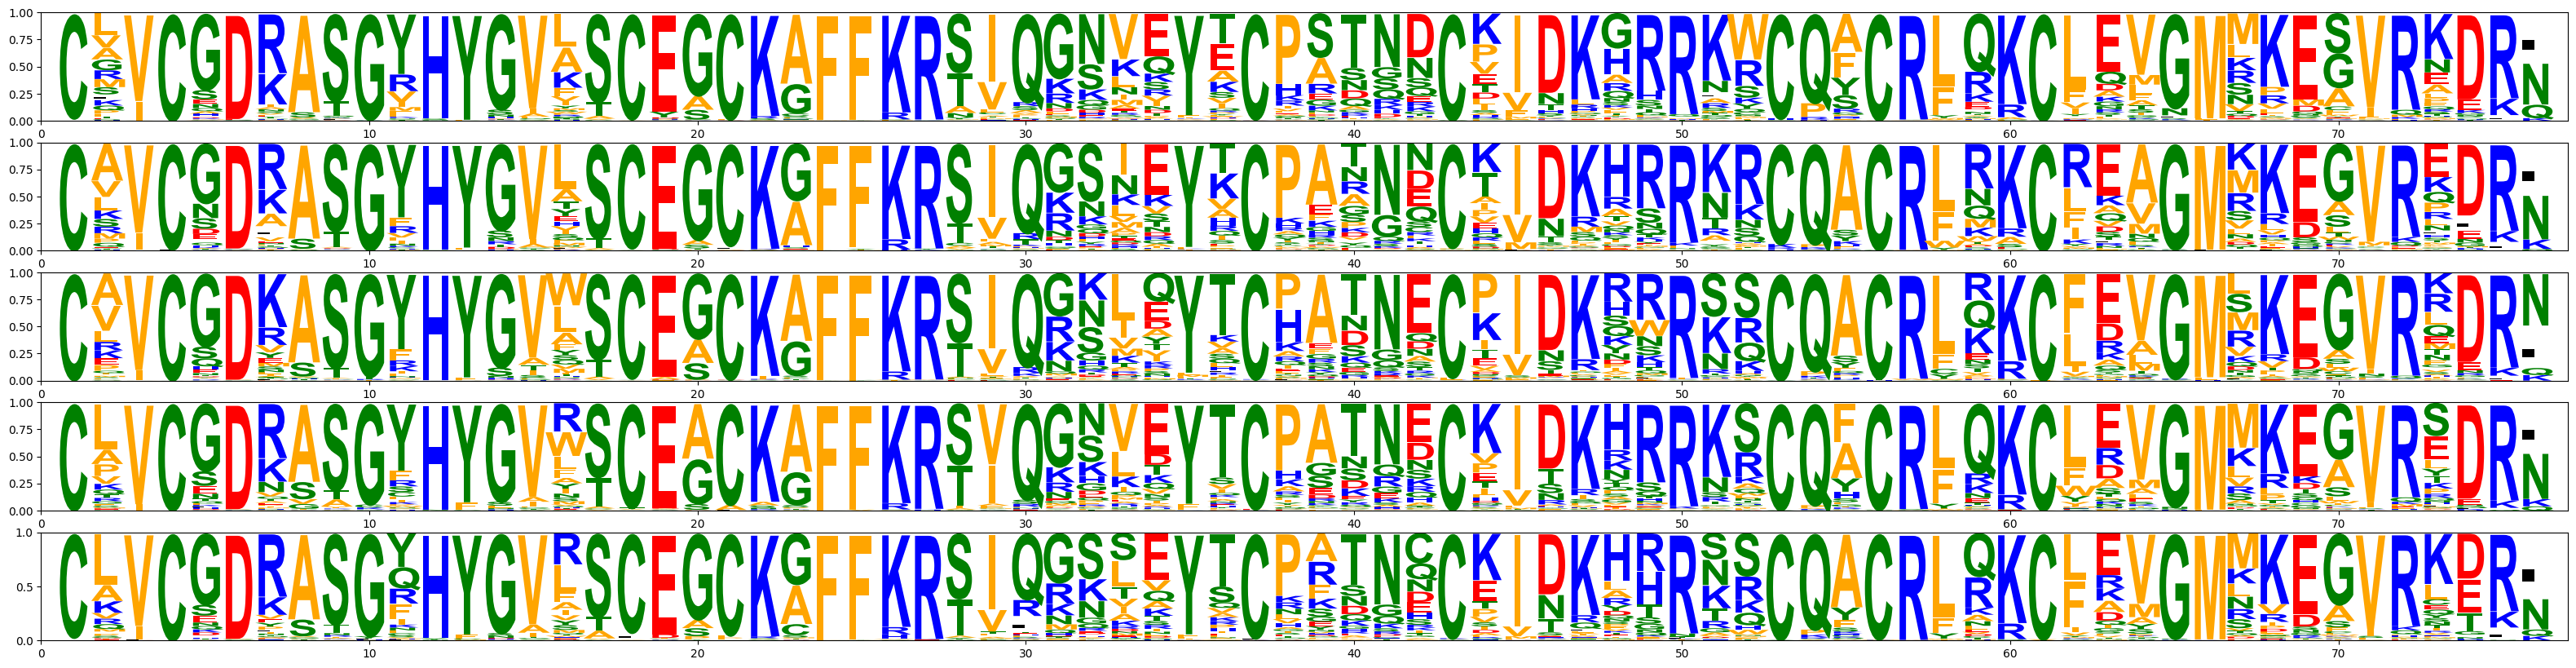

In [36]:
fig, ax = subplots(length(file_mcmc_tree), 1, figsize=(40,10))

for i in eachindex(file_mcmc_tree)
    sca(ax[i])
    plot_sequence_logo_aa(create_logo_from_fasta(file_mcmc_tree[i], aa_alphabet))
    #ax[i].set_title("mcmc tree")
end

gcf()



# Correlations

In [16]:
weights_dca = map(x->parse(Float64, x), readlines(open("/home/matteo/Projects/PhyloBM/DBD/parameters/reweight/weights.dat", "r")))
sum(weights_dca)

2963.3322140132077

In [19]:
corr_msa = compute_corr_matrix(fasta_to_matrix(file_msa_dbd, aa_alphabet))
w_corr_msa = compute_corr_matrix(fasta_to_matrix(file_msa_dbd, aa_alphabet), weights_dca)
corr_mcmc_iid_no_reweight = map(x->compute_corr_matrix(fasta_to_matrix(x, aa_alphabet)), file_mcmc_iid_no_reweight)
corr_mcmc_iid_reweight = map(x->compute_corr_matrix(fasta_to_matrix(x, aa_alphabet)), file_mcmc_iid_reweight)
corr_mcmc_tree = map(x->compute_corr_matrix(fasta_to_matrix(x, aa_alphabet)), file_mcmc_tree);

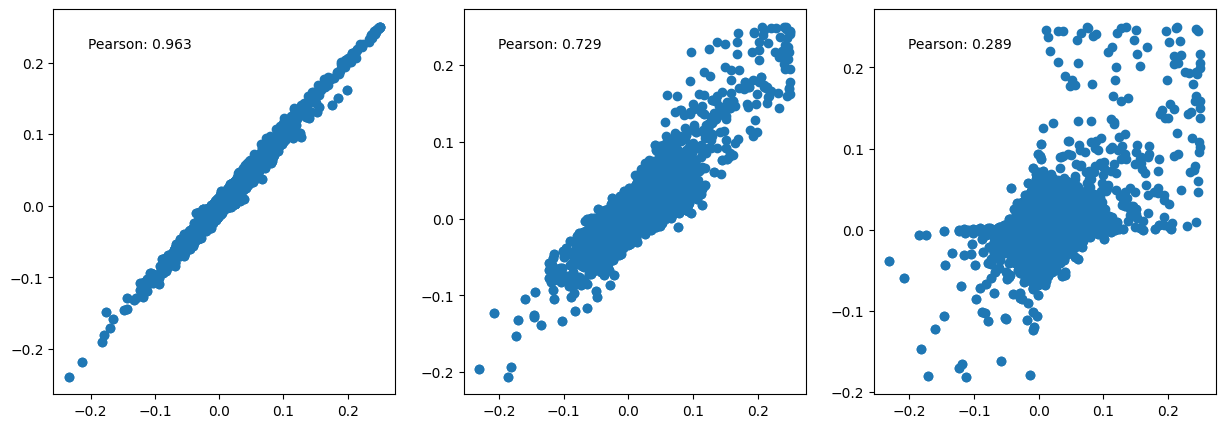

In [24]:
sim_id = 1

fig, ax = subplots(1,3,5)

ax[1].scatter(corr_msa, corr_mcmc_iid_no_reweight[sim_id])
pearson_no_reweight = cor(vec(corr_msa), vec(corr_mcmc_iid_no_reweight[sim_id]))
ax[1].text(0.1, 0.9, "Pearson: $(round(pearson_no_reweight, digits=3))", transform=ax[1].transAxes)

ax[2].scatter(w_corr_msa, corr_mcmc_iid_reweight[sim_id])
pearson_reweight = cor(vec(w_corr_msa), vec(corr_mcmc_iid_reweight[sim_id]))
ax[2].text(0.1, 0.9, "Pearson: $(round(pearson_reweight, digits=3))", transform=ax[2].transAxes)

ax[3].scatter(w_corr_msa, corr_mcmc_tree[sim_id])
pearson_tree = cor(vec(w_corr_msa), vec(corr_mcmc_tree[sim_id]))
ax[3].text(0.1, 0.9, "Pearson: $(round(pearson_tree, digits=3))", transform=ax[3].transAxes)

gcf()

In [25]:
spectrum_msa = compute_cdf(eigen(corr_msa).values)
spectrum_w_msa = compute_cdf(eigen(w_corr_msa).values)
spectrum_mcmc_iid_no_reweight = map(x->compute_cdf(eigen(x).values), corr_mcmc_iid_no_reweight)
spectrum_mcmc_iid_reweight = map(x->compute_cdf(eigen(x).values), corr_mcmc_iid_reweight)
spectrum_mcmc_tree = map(x->compute_cdf(eigen(x).values), corr_mcmc_tree);

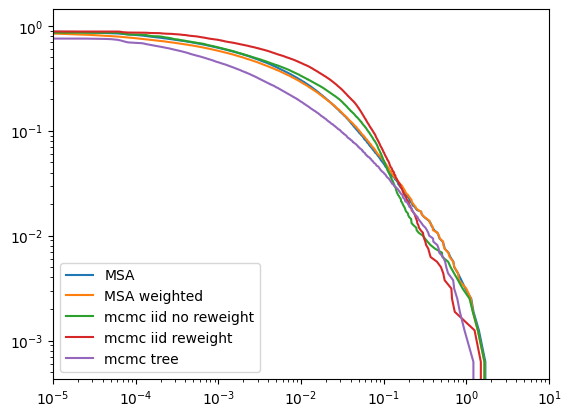

In [28]:
sim_id = 1

figure()
plot(spectrum_msa..., label="MSA")
plot(spectrum_w_msa..., label="MSA weighted")
plot(spectrum_mcmc_iid_no_reweight[sim_id]..., label="mcmc iid no reweight")
plot(spectrum_mcmc_iid_reweight[sim_id]..., label="mcmc iid reweight")
plot(spectrum_mcmc_tree[sim_id]..., label="mcmc tree")
xscale(:log)
yscale(:log)
xlim(1e-5, 10)
legend()

gcf()

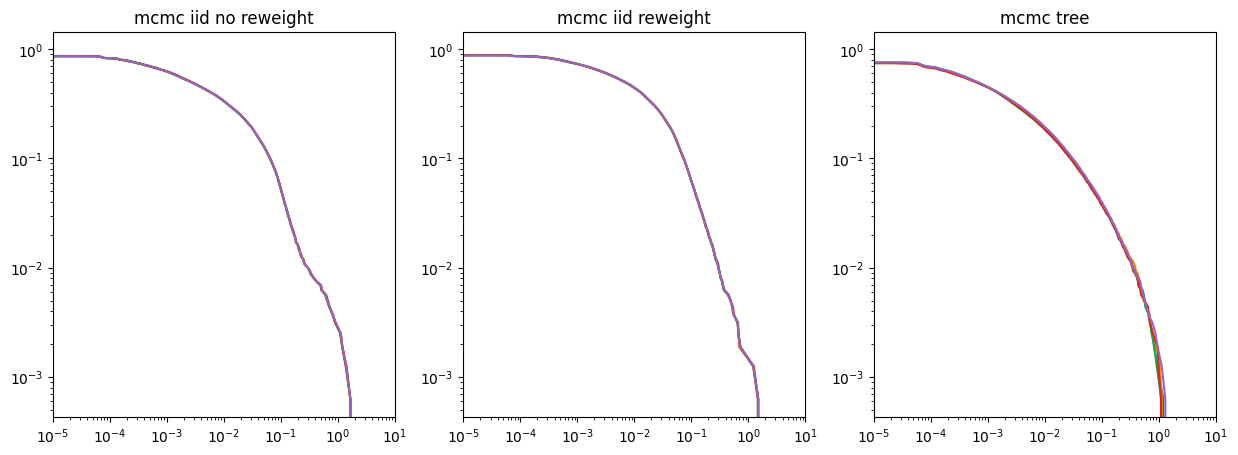

In [35]:
fig, ax = subplots(1,3, 5)

for i in eachindex(spectrum_mcmc_tree)
    ax[1].plot(spectrum_mcmc_iid_no_reweight[i]..., label="sim $i")
    ax[2].plot(spectrum_mcmc_iid_reweight[i]..., label="sim $i")
    ax[3].plot(spectrum_mcmc_tree[i]..., label="sim $i")
end
ax[1].set_title("mcmc iid no reweight")
ax[2].set_title("mcmc iid reweight")
ax[3].set_title("mcmc tree")
map(x->(x.set_xscale(:log), x.set_yscale(:log), x.set_xlim(1e-5, 10)), ax)
gcf()

In [40]:
k_leading_eigenvectors = 5

ev_mcmc_iid_no_reweight = map(x->eigen(x).vectors[:,1:k_leading_eigenvectors], corr_mcmc_iid_no_reweight)
ev_mcmc_iid_reweight = map(x->eigen(x).vectors[:,1:k_leading_eigenvectors], corr_mcmc_iid_reweight)
ev_mcmc_tree = map(x->eigen(x).vectors[:,1:k_leading_eigenvectors], corr_mcmc_tree);

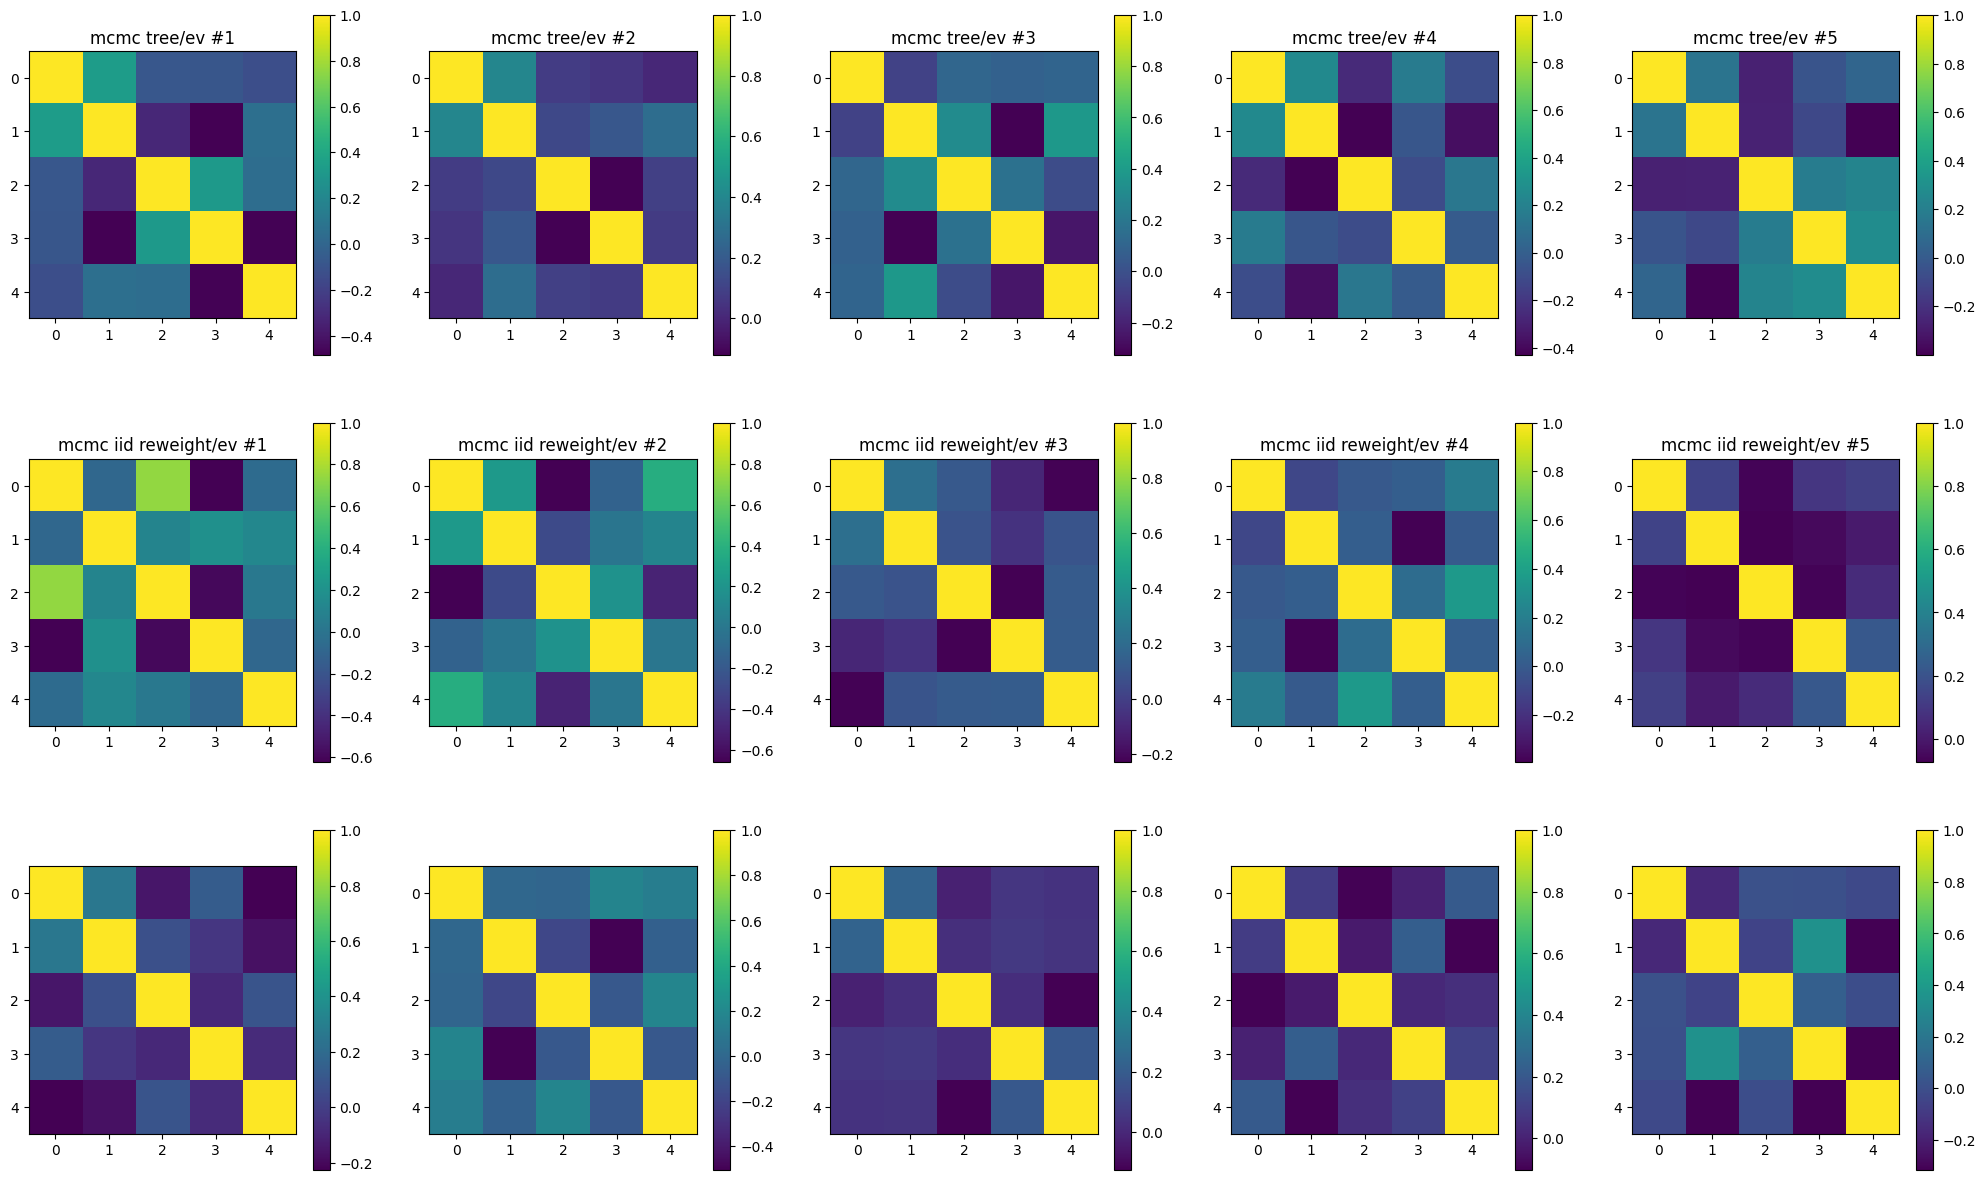

In [52]:
fig, ax = subplots(3, k_leading_eigenvectors, 5)

for i in 1:k_leading_eigenvectors
    mat_proj_mcmc_iid_no_reweight = [dot(ev_mcmc_iid_no_reweight[r][:,i], ev_mcmc_iid_no_reweight[s][:,i]) 
        for r in eachindex(ev_mcmc_iid_no_reweight), s in eachindex(ev_mcmc_iid_no_reweight)]
    f=ax[1,i].imshow(mat_proj_mcmc_iid_no_reweight)
    colorbar(f)
    ax[1,i].set_title("mcmc iid no reweight/ev #$i")

    mat_proj_mcmc_iid_reweight = [dot(ev_mcmc_iid_reweight[r][:,i], ev_mcmc_iid_reweight[s][:,i]) 
        for r in eachindex(ev_mcmc_iid_reweight), s in eachindex(ev_mcmc_iid_reweight)]
    f=ax[2,i].imshow(mat_proj_mcmc_iid_reweight)
    colorbar(f)
    ax[2,i].set_title("mcmc iid reweight/ev #$i")


    mat_proj_mcmc_tree = [dot(ev_mcmc_tree[r][:,i], ev_mcmc_tree[s][:,i]) 
        for r in eachindex(ev_mcmc_tree), s in eachindex(ev_mcmc_tree)]
    f=ax[3,i].imshow(mat_proj_mcmc_tree)
    colorbar(f)
    ax[1,i].set_title("mcmc tree/ev #$i")

end

gcf()